In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Restaurant Reviews/Restaurant reviews.csv')

In [4]:
dataset.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [5]:
columns_to_keep = ['Review', 'Rating']  # Replace with your column names
filtered_dataset = dataset[columns_to_keep]

In [6]:
filtered_dataset.head()

,Review,Rating
0,"The ambience was good, food was quite good . h...",5.0
1,Ambience is too good for a pleasant evening. S...,5.0
2,A must try.. great food great ambience. Thnx f...,5.0
3,Soumen das and Arun was a great guy. Only beca...,5.0
4,Food is good.we ordered Kodi drumsticks and ba...,5.0


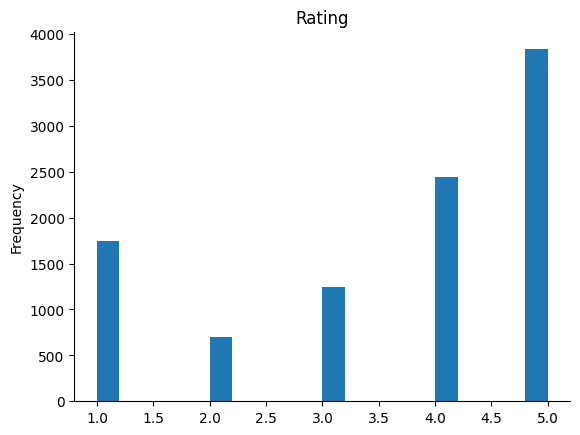

In [67]:
# @title Rating

from matplotlib import pyplot as plt
filtered_dataset['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
filtered_dataset['Rating'].value_counts()

Rating
5.0    3833
4.0    2442
1.0    1744
3.0    1240
2.0     703
Name: count, dtype: int64

# Preprocessing

In [8]:
!pip install nltk

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
# stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if isinstance(text, float):
      text = str(text)
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    # tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

filtered_dataset['preprocessed_text'] = filtered_dataset['Review'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-10-a01248e0dde6>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['preprocessed_text'] = filtered_dataset['Review'].apply(preprocess_text)


In [11]:
filtered_dataset.head()

,Review,Rating,preprocessed_text
0,"The ambience was good, food was quite good . h...",5.0,ambience good food quite good saturday lunch c...
1,Ambience is too good for a pleasant evening. S...,5.0,ambience good pleasant evening service prompt ...
2,A must try.. great food great ambience. Thnx f...,5.0,must try great food great ambience thnx servic...
3,Soumen das and Arun was a great guy. Only beca...,5.0,soumen da arun great guy behavior sincerety go...
4,Food is good.we ordered Kodi drumsticks and ba...,5.0,food ordered kodi drumstick basket mutton biry...


In [12]:
filtered_dataset.drop('Review', axis=1, inplace=True)

<ipython-input-12-8d9361bf4d24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset.drop('Review', axis=1, inplace=True)


In [13]:
filtered_dataset.head()

,Rating,preprocessed_text
0,5.0,ambience good food quite good saturday lunch c...
1,5.0,ambience good pleasant evening service prompt ...
2,5.0,must try great food great ambience thnx servic...
3,5.0,soumen da arun great guy behavior sincerety go...
4,5.0,food ordered kodi drumstick basket mutton biry...


In [25]:
filtered_dataset.dropna(inplace=True)

<ipython-input-25-fc7e8b342835>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset.dropna(inplace=True)


In [26]:
filtered_dataset.to_csv('/content/drive/MyDrive/Restaurant Reviews/cleaned dataset.csv')

# Feature Extraction TF-IDF

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
vect = TfidfVectorizer()

In [27]:
tfidf = vect.fit_transform(filtered_dataset['preprocessed_text'])

In [28]:
tfidf.shape

(9962, 13047)

In [29]:
labels = filtered_dataset['Rating']

In [30]:
labels.shape

(9962,)

# Resampling with Random Oversampling

In [31]:
from imblearn.over_sampling import RandomOverSampler

In [22]:
ro = RandomOverSampler()

In [32]:
X, y = ro.fit_resample(tfidf, labels)

In [33]:
y.value_counts()

Rating
5.0    3833
4.0    3833
1.0    3833
3.0    3833
2.0    3833
Name: count, dtype: int64

# Splitting into Training and Testing Sets

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Naive-Bayes Classifier

In [36]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
NB = MultinomialNB()

In [38]:
NB.fit(X_train, y_train)

MultinomialNB()

In [39]:
predictions = NB.predict(X_test)

In [40]:
print('Accuracy: ', accuracy_score(y_test, predictions))
print('Precision: ', precision_score(y_test, predictions, average='macro'))
print('Recall: ', recall_score(y_test, predictions, average='macro'))
print('F1 Score: ', f1_score(y_test, predictions, average='macro'))

Accuracy:  0.6912340203495956
Precision:  0.7028569479014527
Recall:  0.691439751139611
F1 Score:  0.6926507019073787


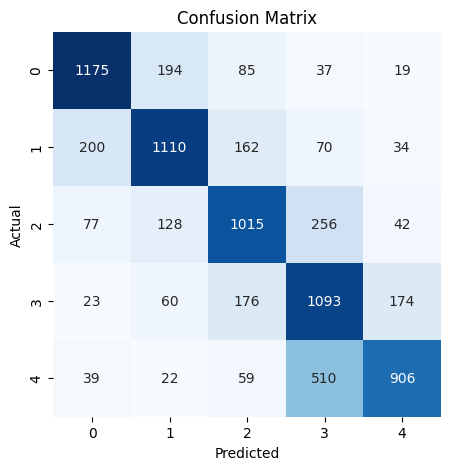

In [41]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap using seaborn
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Random Forest classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
RF = RandomForestClassifier()

In [44]:
RF.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
predictions = RF.predict(X_test)

In [46]:
print('Accuracy: ', accuracy_score(y_test, predictions))
print('Precision: ', precision_score(y_test, predictions, average='macro'))
print('Recall: ', recall_score(y_test, predictions, average='macro'))
print('F1 Score: ', f1_score(y_test, predictions, average='macro'))

Accuracy:  0.8385076963214193
Precision:  0.8399614065187864
Recall:  0.8381884098797929
F1 Score:  0.8385687597244498


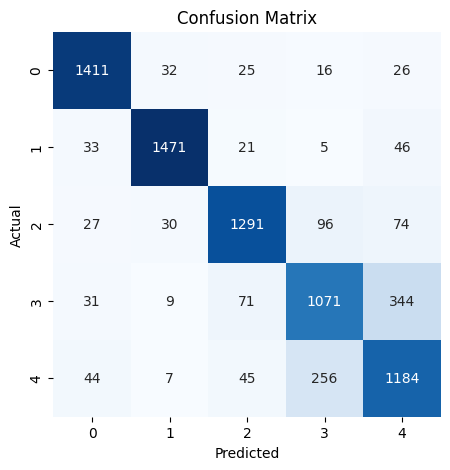

In [47]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap using seaborn
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# K Nearest Neighbor Classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
KNN = KNeighborsClassifier()

In [50]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [51]:
predictions = KNN.predict(X_test)

In [52]:
print('Accuracy: ', accuracy_score(y_test, predictions))
print('Precision: ', precision_score(y_test, predictions, average='macro'))
print('Recall: ', recall_score(y_test, predictions, average='macro'))
print('F1 Score: ', f1_score(y_test, predictions, average='macro'))

Accuracy:  0.5430472214975215
Precision:  0.7290749760701705
Recall:  0.5425351432534654
F1 Score:  0.5214433539182934


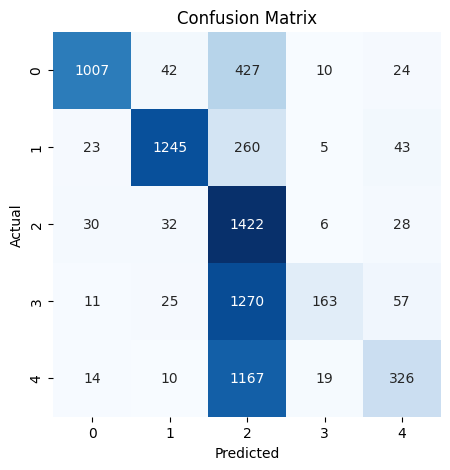

In [54]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap using seaborn
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
DT = DecisionTreeClassifier()

In [57]:
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
predictions = DT.predict(X_test)

In [59]:
print('Accuracy: ', accuracy_score(y_test, predictions))
print('Precision: ', precision_score(y_test, predictions, average='macro'))
print('Recall: ', recall_score(y_test, predictions, average='macro'))
print('F1 Score: ', f1_score(y_test, predictions, average='macro'))

Accuracy:  0.7805896164883903
Precision:  0.7772707929047271
Recall:  0.7800213031476659
F1 Score:  0.7773185171676528


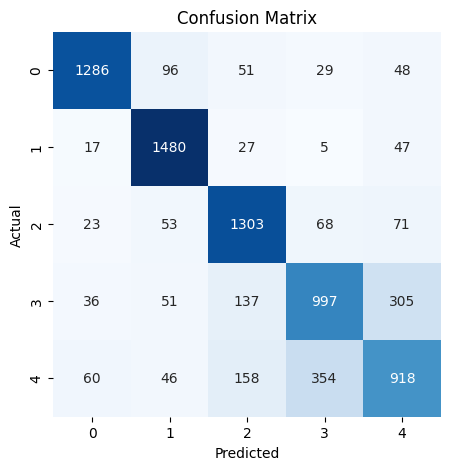

In [60]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap using seaborn
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Support Vector Classifier

In [61]:
from sklearn.svm import SVC

In [62]:
svm = SVC()

In [63]:
svm.fit(X_train, y_train)

SVC()

In [64]:
predictions = svm.predict(X_test)

In [65]:
print('Accuracy: ', accuracy_score(y_test, predictions))
print('Precision: ', precision_score(y_test, predictions, average='macro'))
print('Recall: ', recall_score(y_test, predictions, average='macro'))
print('F1 Score: ', f1_score(y_test, predictions, average='macro'))

Accuracy:  0.8284633446386642
Precision:  0.8283683618697546
Recall:  0.8281447211254738
F1 Score:  0.8282288553321179


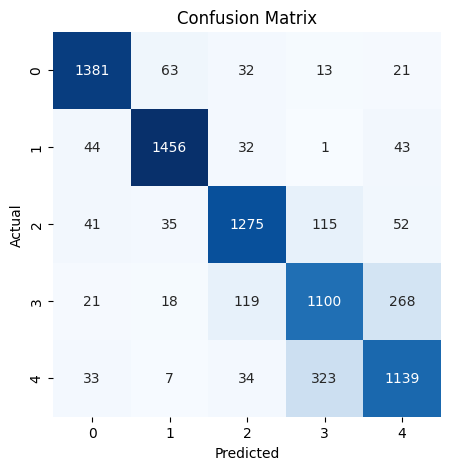

In [66]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap using seaborn
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()